In [1]:
%matplotlib inline

import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from datetime import datetime

In [2]:
# Construct dataset
X1, y1 = make_gaussian_quantiles(mean = (0,0), cov=2,
                                 n_samples=3000, n_features=2,
                                 n_classes=1, random_state=0) #random.seed(datetime.now())

#X = random floating points centered around 0, 300 x 2 matrix (n_samples x n_features)
#y = 0 for EVERY SINGLE INDEX IN ARRAY ?? array of length 300

X2, y2 = make_gaussian_quantiles(mean=(4,4), cov=3,
                                 n_samples=3000, n_features=2,
                                 n_classes=1, random_state=0)

#X = random floating points centered around 3
#y = 0 for EVERY SINGLE INDEX IN ARRAY ??

X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2 + 1))

# Create and train an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, 0)  #X1 corresponds with y values of 0
               #X2 corresponds with y values of 1
               #I think this simply tells the fit that X1 belongs to one class and X2 belongs to a separate class

# for a,b in zip(X,y):
#     bdt.fit(a,b)
        
plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(16, 7))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(Z)

cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
    
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n, # This is a useful tool
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

ValueError: bad input shape ()

In [ ]:
# Create 2 more distributions (test data) for determining how well the algorithm has worked
# As an exercise, try to convert the cartesian coordinates into polar

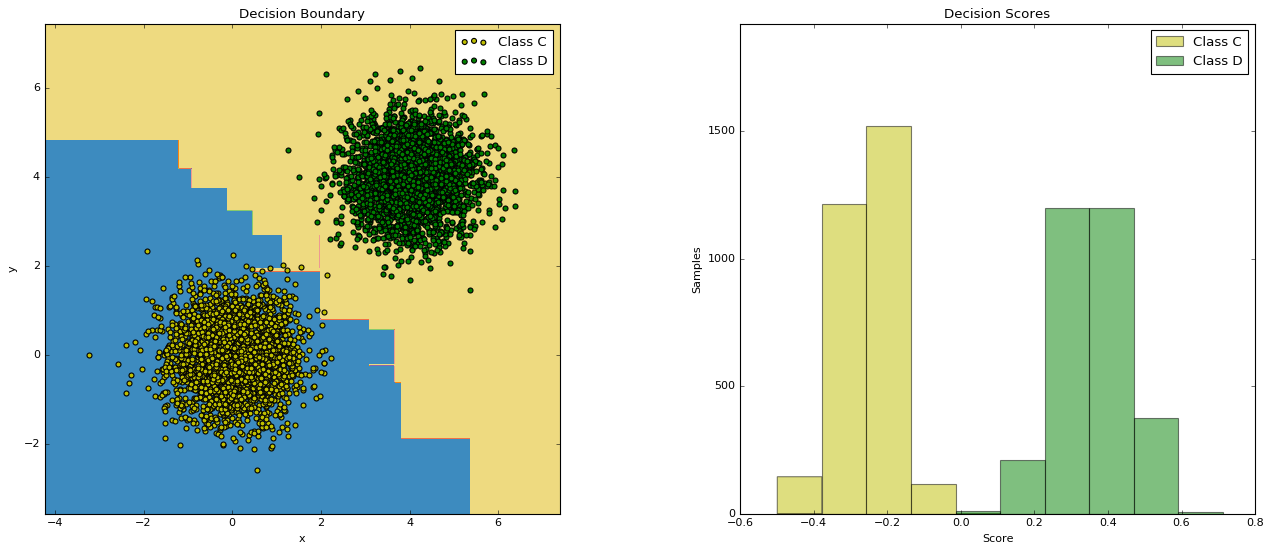

In [3]:
# Construct dataset
X1_test, y1_test = make_gaussian_quantiles(mean = (0,0), cov=.5,
                                 n_samples=3000, n_features=2,
                                 n_classes=1, random_state=random.seed(datetime.now()))

X2_test, y2_test = make_gaussian_quantiles(mean=(4,4), cov=.5,
                                 n_samples=3000, n_features=2,
                                 n_classes=1, random_state=random.seed(datetime.now()))

X_test = np.concatenate((X1_test, X2_test))
y_test = np.concatenate((y1_test, y2_test + 1))

plot_colors = "yg"
plot_step = 0.02
class_names = "CD"

plt.figure(figsize=(16, 7))

# Plot the decision boundaries
plt.subplot(121)
testx_min, testx_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
testy_min, testy_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
testxx, testyy = np.meshgrid(np.arange(testx_min, testx_max, plot_step),
                     np.arange(testy_min, testy_max, plot_step))

testZ = bdt.predict(np.c_[testxx.ravel(), testyy.ravel()])
testZ = testZ.reshape(testxx.shape)
testcs = plt.contourf(testxx, testyy, testZ, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    index = np.where(y_test == i)
    plt.scatter(X_test[index, 0], X_test[index, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(testx_min, testx_max)
plt.ylim(testy_min, testy_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X_test)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y_test == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

In [ ]:
#Modify the program to compare images instead of points
#generate multiple random numbers (x1 and d1, NOT x1 and y1)
#x mean = 0 sigma = 1
#d mean = 1 sigma = 1